# Machine Learning Classification  -  Social Mobility at Census Tracts

### Flatiron Data Science Bootcamp Module 5 Final Project

## 1. Introduction

For the Module 5 Final Project of the Flatiron Data Science Bootcamp we were tasked with addressing a problem that we can solve by using a supervised Machine Learning Classification model. We had the freedom to chose our dataset and problem itself for this project, and I chose to work with issues of social inequality. 

I'm using data made available by [Opportunity Insights](https://opportunityinsights.org/data/), a group of researchers and policy analysts based at Harvard University. I'm using data from two datasets from their project called [The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility](https://opportunityinsights.org/paper/the-opportunity-atlas/). This data allows us to access information on a geographical level (census tracts) regarding many different variables, such as median income, education level, race make up, high paying jobs density and others, while also providing information on median income ranks for parents and children who have been raised in such areas. 

The make up of neighborhoods where children grow up have an impact, according to the research, on their income as adults - as well as other outcomes which we will not address at this time. 

_The problem we are looking to solve is:_

### Identify areas (census tracts) that provide opportunity for positive social mobility
*(based on income of children compared to income of parents). 

Using the data available we wil train our Machine Learning model to be able to classify each area as providing or not opportunity for social mobility in terms of raise in income level. 

Such a classification would be helpful to pinpoint the areas where more support/public policies are needed, as well as opportunities areas for low income families to consider moving to, once affordability for each area is crossed with our classification data. The former could be done as a further step if one chooses to continue working in this project. 

***

### 1. Load, clean and prepare data

Our first step will be to load, analize and prepare our data for machine learning classification. Let's start by importing all the libraries we will need for this project in one step.



In [1]:
# import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, log_loss
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load variables dataset

Our first dataset contains the several different variables we will work with, organized by census tracts. We will load it and analyse it, cleaning any NaNs, eliminating columns that might not be necessary to our analysis and having a look at distributions and outliers as well. 

In [2]:
# load and check dataset
df = pd.read_csv('tract_covariates.csv')
df.head()

,tract,county,state,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,...,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,cz,czname,ann_avg_job_growth_2004_2013,job_density_2013
0,20100,1,1,68638.727,26.171911,0.254428,0.156479,0.009950,66000.0,27375.0,...,83.500000,0.038233,10109.0,3396.0,0.162657,504.75183,11101.0,Montgomery,-0.006769,92.133049
1,20200,1,1,57242.512,24.806705,0.267194,0.146932,0.016337,41107.0,19000.0,...,81.300003,0.089306,9948.0,3328.0,0.611060,1682.17050,11101.0,Montgomery,-0.004253,971.317870
2,20300,1,1,75647.727,25.322525,0.164159,0.224413,0.027096,51250.0,29419.0,...,79.500000,-0.177743,10387.0,3230.0,0.247554,1633.41390,11101.0,Montgomery,0.014218,340.920070
3,20400,1,1,74852.055,22.965347,0.252744,0.230469,0.015083,52704.0,37891.0,...,83.500000,-0.072311,12933.0,3635.0,0.081167,1780.03250,11101.0,Montgomery,-0.019841,207.386370
4,20500,1,1,96174.766,26.222353,0.375063,0.321154,0.046488,52463.0,41516.0,...,77.300003,-0.096140,12933.0,3635.0,0.216236,2446.26220,11101.0,Montgomery,0.018627,800.272640


In [3]:
# check number of columns and rows
df.shape

(74123, 38)

We have a reasonably sized dataset for a machine learning project, with over 74K rows. The full description of all columns can be found on the READ ME file for the [Neighborhood Characteristics by Census Tract](https://opportunityinsights.org/data/), but most are self explanatory. Let's have a look at all the columns. I also want to check for NaNs percentage on each column and the data types.

In [4]:
# check names of all columns and percentage of NaNs in each column
df.isna().sum()/len(df)*100

tract                            0.000000
county                           0.000000
state                            0.000000
hhinc_mean2000                   2.333958
mean_commutetime2000             2.301580
frac_coll_plus2010               1.180470
frac_coll_plus2000               2.238172
foreign_share2010                2.354195
med_hhinc2016                    1.577108
med_hhinc1990                    2.297532
popdensity2000                   1.867167
poor_share2010                   1.330221
poor_share2000                   2.302929
poor_share1990                   2.275947
share_black2010                  0.940329
share_hisp2010                   0.940329
share_asian2010                  2.610526
share_black2000                  2.195000
share_white2000                  2.195000
share_hisp2000                   2.195000
share_asian2000                  3.989315
gsmn_math_g3_2013                2.019616
rent_twobed2015                 23.478542
singleparent_share2010           1

Some of our columns have a high percentage of NaNs. We will need to addres this problem further on.

In [5]:
# check each column type
df.dtypes

tract                             int64
county                            int64
state                             int64
hhinc_mean2000                  float64
mean_commutetime2000            float64
frac_coll_plus2010              float64
frac_coll_plus2000              float64
foreign_share2010               float64
med_hhinc2016                   float64
med_hhinc1990                   float64
popdensity2000                  float64
poor_share2010                  float64
poor_share2000                  float64
poor_share1990                  float64
share_black2010                 float64
share_hisp2010                  float64
share_asian2010                 float64
share_black2000                 float64
share_white2000                 float64
share_hisp2000                  float64
share_asian2000                 float64
gsmn_math_g3_2013               float64
rent_twobed2015                 float64
singleparent_share2010          float64
singleparent_share1990          float64


Most columns are numeric and the categorical one (czname - Name of commuting zone) is not really necessary for our analysis. Each row is identified by a census tract, county and state so in order to make the identifier unique we will combine the three into a unique 'ID' column. We will also choose to eliminate the columns with high percentage of NaNs because either eliminating these rows, looking considerable data, or using an average value to replace the null values would not be good approaches (some data is not available for whole states so filling those values with an average could distort and compromise our data). 

In [6]:
# combine tract, map and state as one unique identifier for each census location
df['id'] = df.tract.map(str) + '-' + df.county.map(str) + '-' + df.state.map(str)
df.id.nunique()

74123

In [7]:
# move identifier column to beginning of dataframe to facilitate visualization
cols = list(df)
cols.insert(0, cols.pop(cols.index('id')))
df = df.loc[:, cols]

# drop columns that are not necessary or that have a too high percentage of NaNs
df.drop(['tract', 'county', 'state', 'cz', 'czname', 'rent_twobed2015', 'ln_wage_growth_hs_grad'], axis=1, inplace=True)
df.head()

,id,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,20100-1-1,68638.727,26.171911,0.254428,0.156479,0.009950,66000.0,27375.0,195.72380,0.105030,...,0.250980,0.273034,0.567308,83.500000,10109.0,3396.0,0.162657,504.75183,-0.006769,92.133049
1,20200-1-1,57242.512,24.806705,0.267194,0.146932,0.016337,41107.0,19000.0,566.38141,0.147590,...,0.392523,0.152040,0.493169,81.300003,9948.0,3328.0,0.611060,1682.17050,-0.004253,971.317870
2,20300-1-1,75647.727,25.322525,0.164159,0.224413,0.027096,51250.0,29419.0,624.19684,0.080385,...,0.244856,0.205534,0.578560,79.500000,10387.0,3230.0,0.247554,1633.41390,0.014218,340.920070
3,20400-1-1,74852.055,22.965347,0.252744,0.230469,0.015083,52704.0,37891.0,713.80396,0.063223,...,0.190722,0.350673,0.596501,83.500000,12933.0,3635.0,0.081167,1780.03250,-0.019841,207.386370
4,20500-1-1,96174.766,26.222353,0.375063,0.321154,0.046488,52463.0,41516.0,529.93030,0.059569,...,0.168000,0.250496,0.661268,77.300003,12933.0,3635.0,0.216236,2446.26220,0.018627,800.272640


In [8]:
# check overal stats of dataframe
df.describe()

,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
count,72393.000000,72417.000000,73248.000000,72464.000000,72378.000000,72954.000000,72420.000000,72739.000000,73137.000000,72416.000000,...,72378.000000,73160.000000,72467.000000,72789.000000,7.268000e+04,7.268000e+04,73426.000000,73642.000000,70664.000000,7.246300e+04
mean,80327.556155,26.946929,0.269188,0.237791,0.120875,58810.315528,32178.195869,1983.551558,0.151696,0.128522,...,0.293477,0.295065,0.594060,78.692768,1.119495e+05,5.855423e+04,0.368949,5236.287765,0.015335,2.157003e+03
std,34437.757785,7.015295,0.182729,0.168770,0.137757,29670.457993,14327.205251,4544.191364,0.128338,0.110132,...,0.157817,0.155631,0.112812,7.876387,2.517040e+05,1.553782e+05,0.307444,11701.388496,0.076179,1.876617e+04
min,7239.477100,2.500000,0.000000,0.000000,0.000000,2499.000000,4999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.606690,0.000000e+00
25%,57366.266000,22.034706,0.130765,0.110645,0.023023,38698.000000,22257.000000,95.557041,0.059191,0.050159,...,0.182487,0.184125,0.532866,74.300003,6.454000e+03,2.279750e+03,0.108159,314.829350,-0.018859,5.673720e+01
50%,71705.953000,26.164030,0.218334,0.186889,0.067070,52291.500000,29806.500000,755.014890,0.116065,0.095659,...,0.258736,0.265494,0.607797,79.599998,4.221550e+04,1.691450e+04,0.265904,2189.878900,0.008496,4.125840e+02
75%,94675.211000,31.048534,0.370618,0.325419,0.168883,71851.000000,39408.250000,2000.978350,0.205636,0.171529,...,0.366292,0.376318,0.670782,84.300003,1.228150e+05,5.771550e+04,0.587899,5284.204800,0.040975,1.371066e+03
max,434368.630000,80.025421,1.000000,1.000000,1.000000,250001.000000,150001.000000,205382.190000,1.000000,1.000000,...,1.000000,1.000000,1.000000,100.000000,2.826437e+06,1.794186e+06,1.000000,543333.310000,1.336456,2.905290e+06


A few things we can notice here: 

- some columns present the same data collected from different years. We can note some disparities, such as how the minimum median income went significantly down from 1990 to 2016. It could make more sense to treat these columns with as percentual variance for the ones that are not shares already, instead of keeping both years' measurements data. In this way, we would be getting more information in relation to which areas became more or less affluent over the time passed. We could try modeling with both approaches and see if which gives us best results. 

- data magnitude varies a lot from column to column and scaling and standardizing will certainly be necessary.

Let's have a look at their distributions as well.

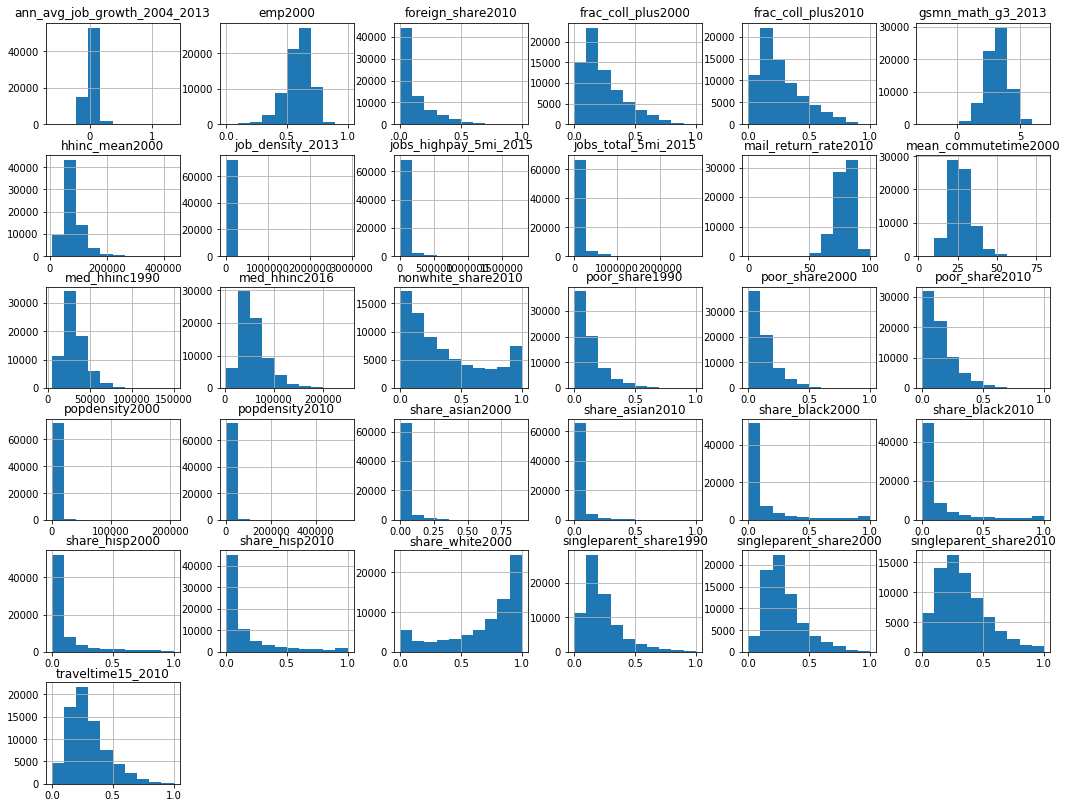

In [9]:
df.hist(figsize=(18,14));

Again, some of our data is heavy on zeros. Further investigating for null values as zeros, and scaling the data will be a necessary step in order to better balance our data for the machine learning algorithms. Let's have a deeper look into our columns unique values and try to see where it makes sense to have zero or not.

In [10]:
# create a columns with percentual change for dimentional columns with measurements over years
df['change_med_hhinc'] = (df['med_hhinc2016'] - df['med_hhinc1990'])/df['med_hhinc1990']*100
df['change_popdensity'] = (df['popdensity2010'] - df['popdensity2000'])/df['popdensity2000']*100

In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
# drop now unecessary columns
df.drop(['med_hhinc2016', 'popdensity2010'], axis=1, inplace=True)

In [13]:
df.head(10)

,id,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,...,traveltime15_2010,emp2000,mail_return_rate2010,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,ann_avg_job_growth_2004_2013,job_density_2013,change_med_hhinc,change_popdensity
0,20100-1-1,68638.727,26.171911,0.254428,0.156479,0.009950,27375.000000,195.723800,0.105030,0.126816,...,0.273034,0.567308,83.500000,10109.0,3396.0,0.162657,-0.006769,92.133049,141.095890,157.889858
1,20200-1-1,57242.512,24.806705,0.267194,0.146932,0.016337,19000.000000,566.381410,0.147590,0.227058,...,0.152040,0.493169,81.300003,9948.0,3328.0,0.611060,-0.004253,971.317870,116.352632,197.003127
2,20300-1-1,75647.727,25.322525,0.164159,0.224413,0.027096,29419.000000,624.196840,0.080385,0.076640,...,0.205534,0.578560,79.500000,10387.0,3230.0,0.247554,0.014218,340.920070,74.207145,161.682501
3,20400-1-1,74852.055,22.965347,0.252744,0.230469,0.015083,37891.000000,713.803960,0.063223,0.045485,...,0.350673,0.596501,83.500000,12933.0,3635.0,0.081167,-0.019841,207.386370,39.093716,149.372741
4,20500-1-1,96174.766,26.222353,0.375063,0.321154,0.046488,41516.000000,529.930300,0.059569,0.036792,...,0.250496,0.661268,77.300003,12933.0,3635.0,0.216236,0.018627,800.272640,26.368147,361.619613
5,20600-1-1,68095.766,21.630421,0.239424,0.160706,0.024985,29000.000000,408.373960,0.105232,0.152161,...,0.341646,0.642679,82.800003,9193.0,3052.0,0.271538,-0.051588,336.777530,119.827586,190.021455
6,20700-1-1,65182.262,23.227625,0.069114,0.116883,0.019895,26895.000000,129.416530,0.166291,0.110000,...,0.127010,0.669659,83.199997,11578.0,3389.0,0.206503,0.005518,141.123430,68.187395,158.191407
7,20801-1-1,76873.500,30.329140,0.282572,0.188181,0.002448,30956.511770,17.487595,0.079720,0.087650,...,0.232400,0.645279,85.500000,1567.0,989.0,0.136644,-0.039299,3.501021,140.992915,267.153002
8,20802-1-1,77310.141,30.726799,0.194913,0.189494,0.006912,31136.969087,38.190983,0.116071,0.084440,...,0.179632,0.645393,85.400002,2615.0,1176.0,0.171155,0.008160,14.048567,96.685810,270.871365
9,20900-1-1,66234.398,36.436531,0.127820,0.089286,0.009670,18430.000000,15.811758,0.099070,0.138435,...,0.061808,0.546725,83.000000,279.0,106.0,0.156652,0.001544,2.565600,141.947911,217.524054


In [14]:
# check overall feature columns one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74123 entries, 0 to 74122
Data columns (total 32 columns):
id                              74123 non-null object
hhinc_mean2000                  72393 non-null float64
mean_commutetime2000            72417 non-null float64
frac_coll_plus2010              73248 non-null float64
frac_coll_plus2000              72464 non-null float64
foreign_share2010               72378 non-null float64
med_hhinc1990                   72420 non-null float64
popdensity2000                  72739 non-null float64
poor_share2010                  73137 non-null float64
poor_share2000                  72416 non-null float64
poor_share1990                  72436 non-null float64
share_black2010                 73426 non-null float64
share_hisp2010                  73426 non-null float64
share_asian2010                 72188 non-null float64
share_black2000                 72496 non-null float64
share_white2000                 72496 non-null float64
share_hisp20

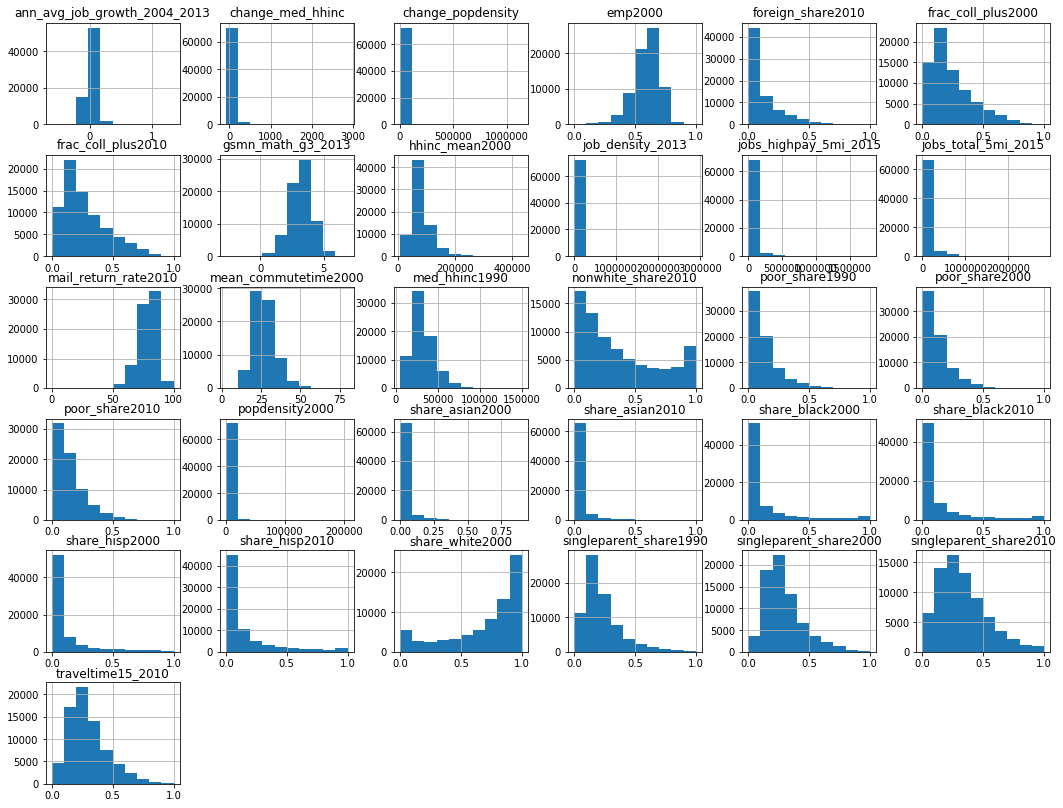

In [15]:
df.hist(figsize=(18,14));

#### Getting the target variable

Now let's get our target variable. We want to measure social mobility - meaning, when children fair better in terms of income than their parents. To do this, we will bring data from another dataset, in the same study, that has ranks for income for both parents and children and do some feature engineering. 

From the dataset called [All Outcomes by Census Tract, Race, Gender and Parental Income Percentile](https://opportunityinsights.org/data/), we will bring the columns that give us the unique identifiers, so that we can match the two datasets, as well as the following two columns, from which we will extract information on social mobility:

* kfr_pooled_pooled_mean = Mean percentile rank (relative to other children born in the same year) in the national distribution of household income (i.e. own earnings and spouse’s earnings) measured as mean earnings in 2014-2015 for the baseline sample

* par_rank_pooled_pooled_mean = Mean household income rank for parents of children of race [race] and gender [gender]. Parents are ranked relative to other parents with children in the same birth cohort (averaged over 1994-1995 and 1998-2000).

To get the outcome for social mobility, we will subtract children's rank from their respective parents' rank on each census tract, providing us with a number that is equivalent to a change in rank. When that result is positive, that means there has been an upward rank change and we classify that as a presenting social mobility. 

In [16]:
# load only necessary information from dataframe
df3 = pd.read_csv('tract_outcomes_early.csv', usecols=['tract', 'county', 'state', 'kfr_pooled_pooled_mean', 'par_rank_pooled_pooled_mean'])

In [17]:
# check dataframe
df3.head()

,state,county,tract,kfr_pooled_pooled_mean,par_rank_pooled_pooled_mean
0,1,1,20100,0.481355,0.512273
1,1,1,20200,0.370569,0.357840
2,1,1,20300,0.487227,0.534671
3,1,1,20400,0.536163,0.597961
4,1,1,20500,0.579610,0.651672


In [18]:
# combine tract, map and state as one unique identifier for each census location
df3['id'] = df3.tract.map(str) + '-' + df3.county.map(str) + '-' + df3.state.map(str)

In [19]:
# move identifier column to beginning of dataframe 
cols = list(df3)
cols.insert(0, cols.pop(cols.index('id')))
df3 = df3.loc[:, cols]

In [20]:
# remove columns that are no longer needed
df3.drop(['tract', 'county', 'state'], axis=1, inplace=True)

In [21]:
# check number of columns and rows
df3.shape

(73278, 3)

In [22]:
# check percentage of NaNs
df3.isna().sum()/len(df3)*100

id                             0.000000
kfr_pooled_pooled_mean         1.724938
par_rank_pooled_pooled_mean    1.724938
dtype: float64

In [23]:
# calculate mobility in a new column by subtracting rank from parents' rank
df3['mobility'] = df3['kfr_pooled_pooled_mean'] - df3['par_rank_pooled_pooled_mean']

In [24]:
# check stats
df3.describe()

,kfr_pooled_pooled_mean,par_rank_pooled_pooled_mean,mobility
count,72014.000000,72014.000000,72014.000000
mean,0.507519,0.523503,-0.015984
std,0.095564,0.153076,0.081375
min,0.158528,0.101707,-0.688561
25%,0.443233,0.413284,-0.072159
50%,0.512092,0.519227,-0.016234
75%,0.576070,0.633467,0.037503
max,0.792643,0.957305,0.419661


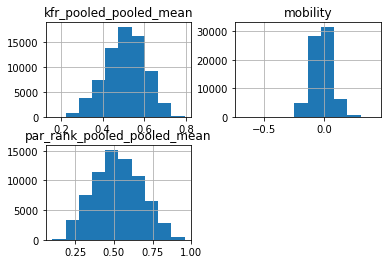

In [25]:
# check distribution
df3.hist();

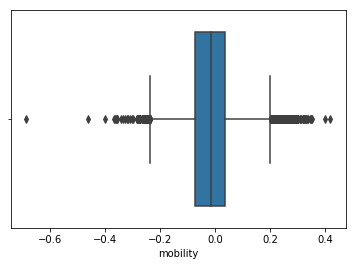

In [26]:
# check outliers
sns.boxplot(df3.mobility)

In [27]:
# check percentage at positive mobility
len(df3.mobility[df3.mobility > 0])/len(df3.mobility)*100

41.312535822484236

In [28]:
# classify outcomes for positive mobility and no/negative mobility
df3['outcome'] = np.where(df3.mobility > 0, 1, 0)

In [29]:
# check balance of target variable
df3.outcome.value_counts()/len(df3)

0    0.586875
1    0.413125
Name: outcome, dtype: float64

In [30]:
# drop all the other columns, keeping only the outcome
df3.drop(columns=['kfr_pooled_pooled_mean', 'par_rank_pooled_pooled_mean', 'mobility'], inplace=True)

In [31]:
# merge dataframes
df = pd.merge(df, df3, on='id')
df.head()

,id,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,...,emp2000,mail_return_rate2010,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,ann_avg_job_growth_2004_2013,job_density_2013,change_med_hhinc,change_popdensity,outcome
0,20100-1-1,68638.727,26.171911,0.254428,0.156479,0.009950,27375.0,195.72380,0.105030,0.126816,...,0.567308,83.500000,10109.0,3396.0,0.162657,-0.006769,92.133049,141.095890,157.889858,0
1,20200-1-1,57242.512,24.806705,0.267194,0.146932,0.016337,19000.0,566.38141,0.147590,0.227058,...,0.493169,81.300003,9948.0,3328.0,0.611060,-0.004253,971.317870,116.352632,197.003127,1
2,20300-1-1,75647.727,25.322525,0.164159,0.224413,0.027096,29419.0,624.19684,0.080385,0.076640,...,0.578560,79.500000,10387.0,3230.0,0.247554,0.014218,340.920070,74.207145,161.682501,0
3,20400-1-1,74852.055,22.965347,0.252744,0.230469,0.015083,37891.0,713.80396,0.063223,0.045485,...,0.596501,83.500000,12933.0,3635.0,0.081167,-0.019841,207.386370,39.093716,149.372741,0
4,20500-1-1,96174.766,26.222353,0.375063,0.321154,0.046488,41516.0,529.93030,0.059569,0.036792,...,0.661268,77.300003,12933.0,3635.0,0.216236,0.018627,800.272640,26.368147,361.619613,0


In [32]:
# check percentage of NaNs
df.isna().sum()/len(df)*100

id                              0.000000
hhinc_mean2000                  1.331914
mean_commutetime2000            1.316903
frac_coll_plus2010              0.388930
frac_coll_plus2000              1.275963
foreign_share2010               1.363301
med_hhinc1990                   1.316903
popdensity2000                  1.104015
poor_share2010                  0.470810
poor_share2000                  1.314173
poor_share1990                  1.303256
share_black2010                 0.227899
share_hisp2010                  0.227899
share_asian2010                 1.819100
share_black2000                 1.241846
share_white2000                 1.241846
share_hisp2000                  1.241846
share_asian2000                 3.040476
gsmn_math_g3_2013               1.621223
singleparent_share2010          0.974372
singleparent_share1990          1.476569
singleparent_share2000          1.355113
traveltime15_2010               0.462622
emp2000                         1.274598
mail_return_rate

We still have some NaNs, but because each row represents a unique location, instead of dropping the NaNs I'll replace them with the column mean value.

In [33]:
# fill nans with columns mean
df = df.fillna(df.mean())

In [34]:
# check lenght of rows and columns
df.shape

(73278, 33)

In [35]:
# check balance of target after drop of NaNs
df.outcome.value_counts()/len(df.outcome)*100

0    58.687464
1    41.312536
Name: outcome, dtype: float64

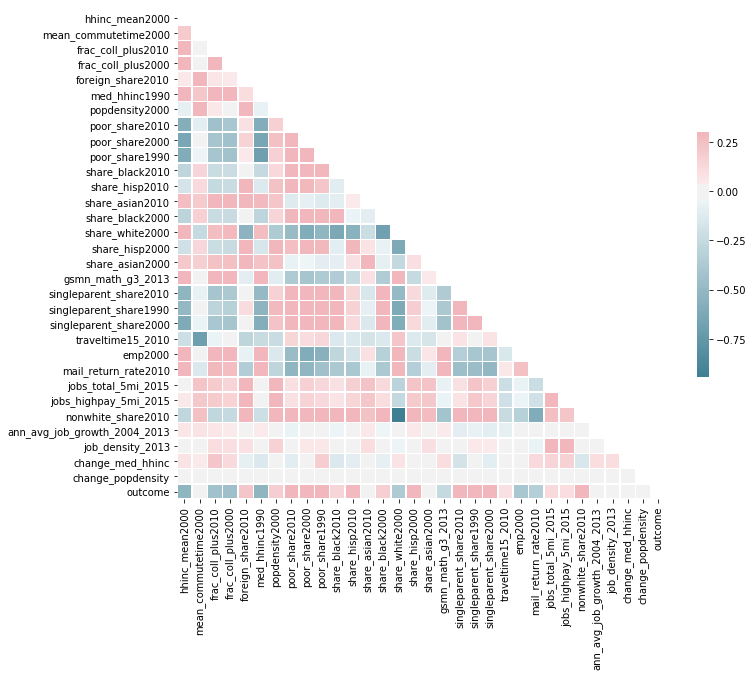

In [36]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The only main correlation we see is for 'white_share200' to 'nonwhite_share2010', which seems reasonable since they are in a way opposite measurements, and also informs us that overall the racial make up of most regions haven't change much in a decade. 

Ok, we have all our data looking good and we're ready to start trying out some models. Let's separate our target and feature variables, and split the data into train, validating and test sets. We will also use a pipeline for our process that includes some feature engineering (scaling data), so this step will be done during the modeling part.

In [37]:
# define target variable
target = df.outcome

In [38]:
# define features
features = df.iloc[:,1:32]

In [39]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [40]:
# split again the train data into train and validation 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [41]:
# check the shape of resultig datasets
print(f'Train data shape: {X_train.shape, y_train.shape}')
print(f'Validation data shape: {X_valid.shape, y_valid.shape}')
print(f'Test data shape: {X_test.shape, y_test.shape}')

Train data shape: ((46897, 31), (46897,))
Validation data shape: ((11725, 31), (11725,))
Test data shape: ((14656, 31), (14656,))


In [53]:
# check balance of outomes in train dataset
y_train.value_counts()/len(y_train)

0    0.585539
1    0.414461
Name: outcome, dtype: float64

In [54]:
# check balance of outomes in validation dataset
y_valid.value_counts()/len(y_valid)

0    0.586951
1    0.413049
Name: outcome, dtype: float64

In [55]:
# check balance of outomes in test dataset
y_test.value_counts()/len(y_test)

0    0.591089
1    0.408911
Name: outcome, dtype: float64

### 2. Fit, Evaluate and Tune Models

We have a supervised binary classification problem, and thus we could use several different types of models to get our results. We also don't have a too large dataset, which releases some constraints in terms of processing cost. Because we have such freedom and not too much computational demands we will go through several diferent types of models and see how well they perform.

#### Selecting a model

I'll create a pipeline and run a vanilla model for several different types of models to see how each perform with our data. My pipeline will scale all the data and train each of the models in a loop. Then we will check the accuracy of each of the models using the validation data sets to compare and decide which one can provide us the the best results for our data with the least tuning.

In [56]:
# list all classifiers to test
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    LinearSVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
# run a pipeline in a loop for each classifier, along with its validation scores
for classifier in classifiers:
    pipe = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print(f'model score: {pipe.score(X_valid, y_valid)}')
    print('----------------')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
model score: 0.8420469083155651
----------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
model score: 0.8640511727078891
----------------
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
model score: 0.8438379530916844
----------------
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=

#### Tuning the model

Great! Our results show that we are likely looking at a non-linear Support Vector Machine as the best model for our classification problem. Now let's try to improve our model results with some tuning of the hyperparameters. I want to run another pipeline now on this model with a grid search and crossvalidation to test out and find the best parameters for our model.

In [80]:
# create a pipeline for grid search
pipe_svm = Pipeline([('scaler', StandardScaler()),
                     ('SVM', SVC())])

# Set grid search parameters for C and gamma for a rbf kennel
param_grid_svm = {'SVM__C': [0.1, 1, 10],  
              'SVM__gamma': [1, 0.1, 0.01]}

# Construct grid search
grid_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, n_jobs = -1)

In [81]:
# Fit using the grid search
%time grid_svm.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 35.1min finished


CPU times: user 1min 20s, sys: 1.13 s, total: 1min 21s
Wall time: 36min 27s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'SVM__C': [0.1, 1, 10], 'SVM__gamma': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [83]:
# check which are the best parameters
grid_svm.best_params_

{'SVM__C': 10, 'SVM__gamma': 0.01}

In [84]:
# check train accuracy score
grid_svm.score(X_train, y_train)

0.8749173721133549

In [85]:
# check validation accuracy score
grid_svm.score(X_valid, y_valid)

0.8622601279317698

In [86]:
# print the classification report with all scoring results 
predictions = grid_svm.predict(X_valid) 
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6882
           1       0.83      0.83      0.83      4843

   micro avg       0.86      0.86      0.86     11725
   macro avg       0.86      0.86      0.86     11725
weighted avg       0.86      0.86      0.86     11725



In [87]:
# print confusion matrix
print(confusion_matrix(y_valid,predictions))

[[6082  800]
 [ 815 4028]]


This is a not too bad result, but not too much improvement from our initial model. I also want to try a polynomial kernel to see how it does. To do this I'll run another pipeline.

In [73]:
# create a pipeline for grid search
pipe_svm2 = Pipeline([('scaler', StandardScaler()),
                     ('SVM', SVC())])

# Set grid search parameters to fit a poly kernell with different degrees
param_grid_svm2 = {'SVM__kernel':['poly'],'SVM__degree': [2,3,4]}

# Construct grid search
grid_svm2 = GridSearchCV(estimator=pipe_svm2,
            param_grid=param_grid_svm2,
            scoring='accuracy',
            cv=3, verbose=2, n_jobs = -1)

In [74]:
# Fit using the grid search
%time grid_svm2.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  4.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.4min finished


CPU times: user 1min 17s, sys: 543 ms, total: 1min 17s
Wall time: 6min 41s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'SVM__kernel': ['poly'], 'SVM__degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [82]:
# check which are the best parameters
grid_svm2.best_params_

{'SVM__degree': 3, 'SVM__kernel': 'poly'}

In [75]:
# check validation accuracy score
grid_svm2.score(X_test, y_test)

0.8436817685589519

In [77]:
# check validation accuracy score
grid_svm2.score(X_valid, y_valid)

0.8440085287846482

In [78]:
# print the classification report with all scoring results 
predictions = grid_svm2.predict(X_valid) 
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6882
           1       0.86      0.74      0.80      4843

   micro avg       0.84      0.84      0.84     11725
   macro avg       0.85      0.83      0.84     11725
weighted avg       0.85      0.84      0.84     11725



In [79]:
# print confusion matrix
print(confusion_matrix(y_valid,predictions))

[[6317  565]
 [1264 3579]]


for future work: evaluate by race and gender to see if they are good predictors or even better predictors than other variables